<hr>
<a id='top'></a> 
###  Table of Contents

## <a href='#data_wrangling'>2. Data Wrangling</a>

## <a href='#eda'>3. EDA and Data Storytelling</a>

## <a href='#machine_learning'>4. Machine Learning</a>

### <a href='#knn'>4.1. k-Nearest Neighbor Classifier</a>

### <a href='#logreg'>4.2. Logistic Regression Classifier</a>

### <a href='#rf'>4.3. Random Forest Classifier</a>

<hr>
## <a id='data_wrangling'>2. Data Wrangling</a> 

In [1]:
# IMPORT PACKAGES
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# GETTING THE DATA
liked = pd.read_excel('Google Drive/Springboard/Capstone1/LIKES.xlsx')
disliked = pd.read_excel('Google Drive/Springboard/Capstone1/DISLIKES.xlsx')
tophits = pd.read_excel('Google Drive/Springboard/Capstone1/TOP_HITS.xlsx')

### Inspecting the Data

In [3]:
liked.head()

,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.
0,Where Is My Mind?,Pixies,2004-05-03 00:00:00,81.0,44.0,51.0,-14.0,24.0,03:49:00,1.0,35.0
1,Men's Needs,The Cribs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I Never,Rilo Kiley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Maps,Yeah Yeah Yeahs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hold You,Gyptian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
liked.describe()

,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,117.832258,55.961290,63.837097,-7.811290,39.179032,28.493548,58.164516
std,28.322587,19.078745,14.554035,3.001594,22.441564,27.848569,18.191017
min,52.000000,6.000000,21.000000,-25.000000,3.000000,0.000000,0.000000
25%,96.000000,41.000000,54.000000,-9.000000,21.000000,5.000000,48.000000
50%,118.500000,55.500000,65.000000,-7.000000,36.000000,18.000000,62.000000
75%,137.000000,69.000000,74.000000,-6.000000,55.000000,48.000000,70.250000
max,204.000000,99.000000,95.000000,-2.000000,97.000000,96.000000,96.000000


In [5]:
liked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 11 columns):
TITLE       630 non-null object
ARTIST      629 non-null object
RELEASE     620 non-null object
BPM         620 non-null float64
ENERGY      620 non-null float64
DANCE       620 non-null float64
LOUD        620 non-null float64
VALENCE     620 non-null float64
LENGTH      620 non-null object
ACOUSTIC    620 non-null float64
POP.        620 non-null float64
dtypes: float64(7), object(4)
memory usage: 54.2+ KB


### Dropping Null Values

In [6]:
liked = liked.dropna().reset_index(drop=True)
disliked = disliked.dropna().reset_index(drop=True)
tophits = tophits.dropna().reset_index(drop=True)

### Changing Column Names , Data Types, Date/Time Conversions

In [7]:
# CHANGE COLUMN NAME FROM 'POP.' TO 'POPULARITY'
liked = liked.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))
disliked = disliked.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))
tophits = tophits.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))

# ADD 'YEAR' COLUMN FROM 'RELEASE' COLUMN & CONVERT OBJECT TYPE TO NUMERIC TYPE
liked['YEAR'] = liked['RELEASE'].astype(str).str[0:4]
liked['YEAR'] = liked['YEAR'].convert_objects(convert_numeric=True)

disliked['YEAR'] = disliked['RELEASE'].astype(str).str[0:4]
disliked['YEAR'] = disliked['YEAR'].convert_objects(convert_numeric=True)

tophits['YEAR'] = tophits['RELEASE'].astype(str).str[0:4]
tophits['YEAR'] = tophits['YEAR'].convert_objects(convert_numeric=True)

# OBJECT TYPE INTO NUMERIC TYPE IN 'LENGTH' COLUMN 
liked['MINUTES'] = liked['LENGTH'].astype(str).str[0:2].convert_objects(convert_numeric=True)
liked['SECONDS'] = liked['LENGTH'].astype(str).str[3:5].convert_objects(convert_numeric=True)

disliked['MINUTES'] = disliked['LENGTH'].astype(str).str[0:2].convert_objects(convert_numeric=True)
disliked['SECONDS'] = disliked['LENGTH'].astype(str).str[3:5].convert_objects(convert_numeric=True)

tophits['MINUTES'] = tophits['LENGTH'].astype(str).str[0:2].convert_objects(convert_numeric=True)
tophits['SECONDS'] = tophits['LENGTH'].astype(str).str[3:5].convert_objects(convert_numeric=True)

# CONVERT MINUTES TO SECONDS & ADD 'DURATION' COLUMN, DROP 'LENGTH', 'MINUTES', 'SECONDS', AND 'RELEASE' COLUMNS
liked['DURATION'] = liked['MINUTES'] * 60 + liked['SECONDS']
liked = liked.drop(['LENGTH','MINUTES', 'SECONDS', 'RELEASE'], 1)

disliked['DURATION'] = disliked['MINUTES'] * 60 + disliked['SECONDS']
disliked = disliked.drop(['LENGTH','MINUTES', 'SECONDS', 'RELEASE'], 1)

tophits['DURATION'] = tophits['MINUTES'] * 60 + tophits['SECONDS']
tophits = tophits.drop(['LENGTH','MINUTES', 'SECONDS', 'RELEASE'], 1)


/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # This is added back by InteractiveShellApp.init_path()
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel

<hr>
## <a id='eda'>3. EDA and Data Storytelling</a> 

### 3.1. Means and Standard Deviations

In [8]:
# GET DESCRIBE VALUES
d1 = liked.describe()
d2 = disliked.describe()
d3 = tophits.describe()

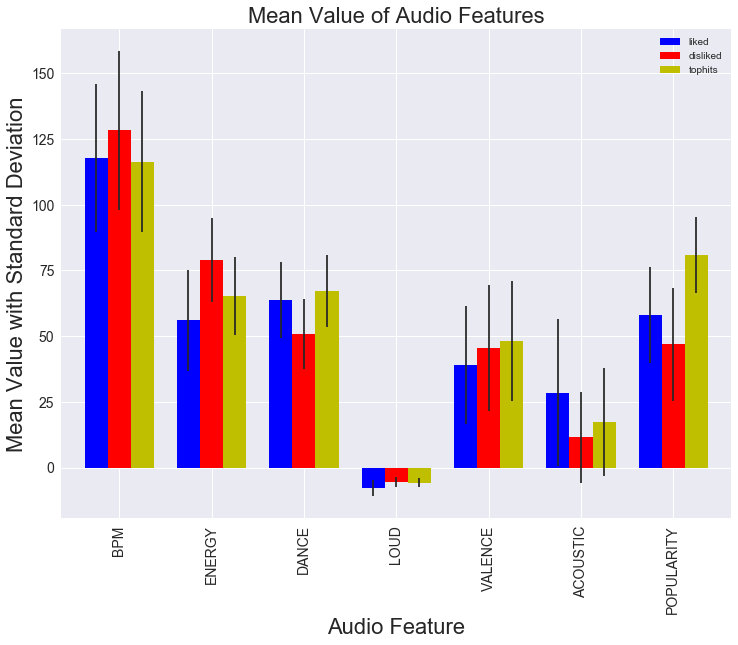

In [9]:
sns.set()

# GET CURRENT SIZE
fig_size = plt.rcParams['figure.figsize']
 
# SET WIDTH AND HEIGHT
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size

# GROUPED BAR PLOTS
avgs = pd.concat([d1.iloc[1,:7].rename('liked'), 
                  d2.iloc[1,:7].rename('disliked'), 
                  d3.iloc[1,:7].rename('tophits')], axis=1).plot(kind='bar', 
                                                                 width=.75, 
                                                                 fontsize=14,
                                                                 yerr=[d1.iloc[2,:7], 
                                                                       d2.iloc[2,:7], 
                                                                       d3.iloc[2,:7]],
                                                                 color=['b','r','y'])

# SET TITLE AND LABELS 
avgs.set_title('Mean Value of Audio Features', fontsize=22)
avgs.set_xlabel('Audio Feature', fontsize=22)
avgs.set_ylabel('Mean Value with Standard Deviation', fontsize=22)

plt.show()

### Distributions: Liked vs. Disliked Songs

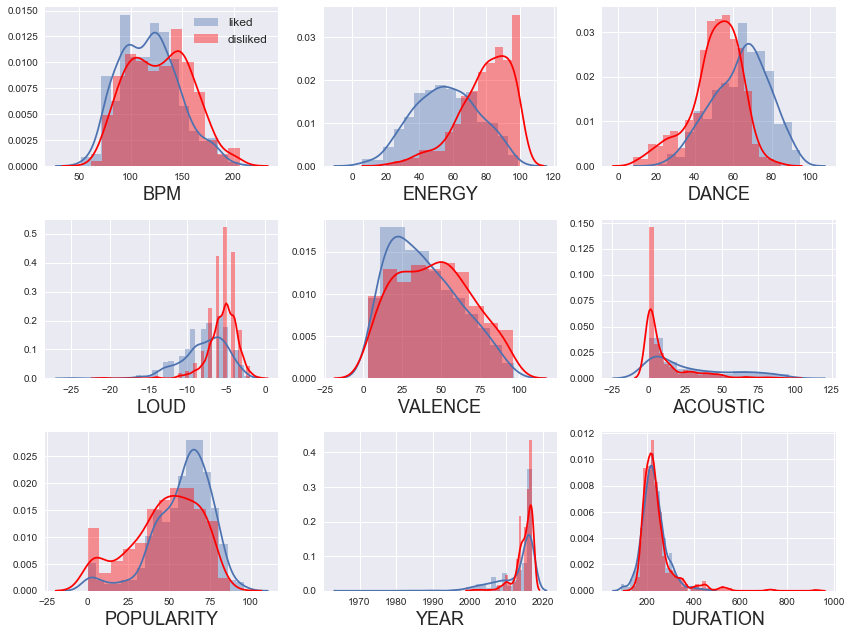

In [10]:
# DISTRIBUTIONS
plt.subplot(331)
sns.distplot(liked.BPM, label='liked')
sns.distplot(disliked.BPM, color='r', label='disliked')
plt.xlabel('BPM', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(liked.ENERGY)
sns.distplot(disliked.ENERGY, color='r')
plt.xlabel('ENERGY', fontsize=18)

plt.subplot(333)
sns.distplot(liked.DANCE)
sns.distplot(disliked.DANCE, color='r')
plt.xlabel('DANCE', fontsize=18)

plt.subplot(334)
sns.distplot(liked.LOUD)
sns.distplot(disliked.LOUD, color='r')
plt.xlabel('LOUD', fontsize=18)

plt.subplot(335)
sns.distplot(liked.VALENCE)
sns.distplot(disliked.VALENCE, color='r')
plt.xlabel('VALENCE', fontsize=18)

plt.subplot(336)
sns.distplot(liked.ACOUSTIC)
sns.distplot(disliked.ACOUSTIC, color='r')
plt.xlabel('ACOUSTIC', fontsize=18)

plt.subplot(337)
sns.distplot(liked.POPULARITY)
sns.distplot(disliked.POPULARITY, color='r')
plt.xlabel('POPULARITY', fontsize=18)

plt.subplot(338)
sns.distplot(liked.YEAR)
sns.distplot(disliked.YEAR, color='r')
plt.xlabel('YEAR', fontsize=18)

plt.subplot(339)
sns.distplot(liked.DURATION)
sns.distplot(disliked.DURATION, color='r')
plt.xlabel('DURATION', fontsize=18)

plt.tight_layout()
plt.show()


### Finding Outliers: Liked & Disliked

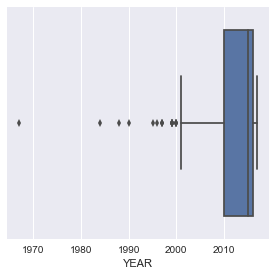

In [11]:
# FINDING OUTLIERS - LIKED
sns.factorplot(x='YEAR', data=liked, kind='box')
plt.show()

In [12]:
# FINDING OUTLIERS - LIKED
liked[liked.YEAR < 1980]

,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POPULARITY,YEAR,DURATION
85,Sunday Morning,The Velvet Underground,106.0,48.0,50.0,-12.0,51.0,8.0,4.0,1967,174


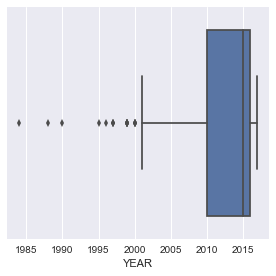

In [13]:
# REMOVING OUTLIERS - LIKED
liked = liked[liked.YEAR > 1980]
sns.factorplot(x='YEAR', data=liked, kind='box')
plt.show()

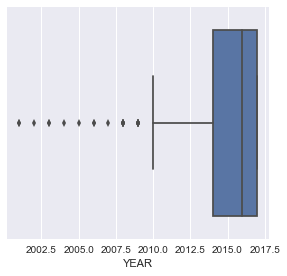

In [14]:
# FINDING OUTLIERS - DISLIKED
sns.factorplot(x='YEAR', data=disliked, kind='box')
plt.show()

In [15]:
disliked[disliked['YEAR'] < 2005]

,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POPULARITY,YEAR,DURATION
1,Somewhere Down in Texas,Jason Boland,72.0,49.0,48.0,-11.0,50.0,14.0,5.0,2001,352
65,Days Go By,Keith Urban,132.0,89.0,59.0,-3.0,75.0,6.0,48.0,2004,225
74,What Was I Thinkin',Dierks Bentley,165.0,83.0,55.0,-6.0,93.0,15.0,65.0,2003,261
212,Alright Guy - Album Version (Remix),Gary Allan,121.0,77.0,67.0,-6.0,65.0,6.0,37.0,2001,262
226,Chicks Dig It,Chris Cagle,104.0,92.0,60.0,-5.0,70.0,2.0,60.0,2003,211
229,"Courtesy Of The Red, White And Blue (The Angry...",Toby Keith,110.0,67.0,42.0,-6.0,35.0,52.0,48.0,2002,196


### Distributions: Liked vs. Today's Top Hits Songs

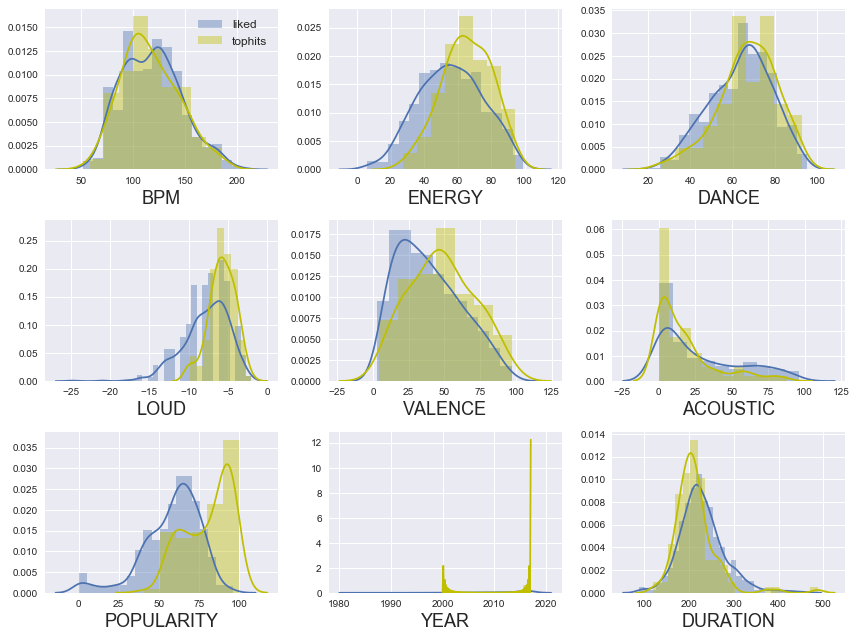

In [16]:
plt.subplot(331)
sns.distplot(liked.BPM, label='liked')
sns.distplot(tophits.BPM, color='y', label='tophits')
plt.xlabel('BPM', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(liked.ENERGY)
sns.distplot(tophits.ENERGY, color='y')
plt.xlabel('ENERGY', fontsize=18)

plt.subplot(333)
sns.distplot(liked.DANCE)
sns.distplot(tophits.DANCE, color='y')
plt.xlabel('DANCE', fontsize=18)

plt.subplot(334)
sns.distplot(liked.LOUD)
sns.distplot(tophits.LOUD, color='y')
plt.xlabel('LOUD', fontsize=18)

plt.subplot(335)
sns.distplot(liked.VALENCE)
sns.distplot(tophits.VALENCE, color='y')
plt.xlabel('VALENCE', fontsize=18)

plt.subplot(336)
sns.distplot(liked.ACOUSTIC)
sns.distplot(tophits.ACOUSTIC, color='y')
plt.xlabel('ACOUSTIC', fontsize=18)

plt.subplot(337)
sns.distplot(liked.POPULARITY)
sns.distplot(tophits.POPULARITY, color='y')
plt.xlabel('POPULARITY', fontsize=18)

plt.subplot(338)
sns.distplot(liked.YEAR)
sns.distplot(tophits.YEAR, color='y')
plt.xlabel('YEAR', fontsize=18)

plt.subplot(339)
sns.distplot(liked.DURATION)
sns.distplot(tophits.DURATION, color='y')
plt.xlabel('DURATION', fontsize=18)

plt.tight_layout()
plt.show()


### Finding & Removing Outliers

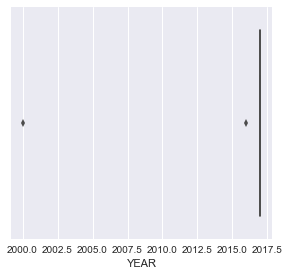

In [17]:
# FINDING OUTLIERS - TOP HITS
sns.factorplot(x='YEAR', data=tophits, kind='box')
plt.show()

In [18]:
# FINDING OUTLIERS - TOP HITS
tophits[tophits['YEAR'] < 2002]

,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POPULARITY,YEAR,DURATION
113,For the Damaged Coda,Blonde Redhead,141.0,47.0,50.0,-10.0,8.0,80.0,71.0,2000,157


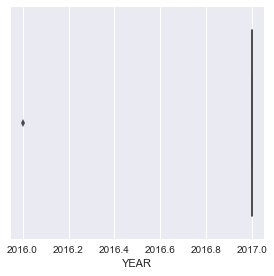

In [19]:
# REMOVING OUTLIERS - TOP HITS
tophits = tophits[tophits.YEAR > 2002]
sns.factorplot(x='YEAR', data=tophits, kind='box')
plt.show()

<hr>
## <a id='machine_learning'>4. Machine Learning</a>

#### Data Preprocessing

In [20]:
# IMPORT PACKAGES
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, matthews_corrcoef, log_loss,
                             mean_squared_error)
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

# ADD TARGET COLUMN, 1 FOR LIKED SONGS, 0 FOR DISLIKED SONGS
liked['TARGET'] = 1
disliked['TARGET'] = 0

# COMBINE LIKED and DISLIKED PLAYLIST
combined = pd.concat([liked,disliked], ignore_index=True)

In [21]:
print('Liked Count:', len(liked))
print('Disliked Count:', len(disliked))

Liked Count: 619
Disliked Count: 529


In [22]:
X = combined[['BPM','ENERGY','DANCE','LOUD','VALENCE','ACOUSTIC','POPULARITY']]
y = combined['TARGET']

#### Imbalanced Data - SMOTE

In [25]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='auto', kind='regular')
X_smote , y_smote = sm.fit_sample(X,y)

print('SMOTE Features Set:', X_smote.shape)
print('SMOTE Training Set:', y_smote.shape)

SMOTE Features Set: (1238, 7)
SMOTE Training Set: (1238,)


#### Imbalanced Data - Upsample Minority Class

In [26]:
# SEPARATE MAJORITY AND MINORITY CLASSES
df_majority = combined[combined.TARGET==1]
df_minority = combined[combined.TARGET==0]
 
# UPSAMPLE MINORITY CLASS
df_minority_up = resample(df_minority, 
                          replace=True,     # sample with replacement
                          n_samples=619,    # to match majority class
                          random_state=12)  # reproducible results

# COMBINED MAJORITY CLASS WITH UPSAMPLED MINORITY CLASS
df_upsampled = pd.concat([df_majority, df_minority_up])
 
# Display new class counts
df_upsampled.TARGET.value_counts()

1    619
0    619
Name: TARGET, dtype: int64

#### Create Features / Target Variables

In [27]:
# FEATURES & TARGET VARIABLE
X_bal = df_upsampled[['BPM','ENERGY','DANCE','LOUD','VALENCE','ACOUSTIC','POPULARITY']]
y_bal = df_upsampled['TARGET']

#### Training / Testing Data

In [28]:
# TRAINING / TESTING DATA
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal)
print('Features Training Set:', X_train.shape, 'Features Testing Set:', X_test.shape)
print('Target Training Set:', y_train.shape, 'Target Testing Set:', y_test.shape)

Features Training Set: (928, 7) Features Testing Set: (310, 7)
Target Training Set: (928,) Target Testing Set: (310,)


#### Training / Testing Data - SMOTE

In [29]:
# TRAINING / TESTING DATA
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_smote, y_smote)
print('Features Training Set:', X_train_sm.shape, 'Features Testing Set:', X_test_sm.shape)
print('Target Training Set:', y_train_sm.shape, 'Target Testing Set:', y_test_sm.shape)

Features Training Set: (928, 7) Features Testing Set: (310, 7)
Target Training Set: (928,) Target Testing Set: (310,)


<hr>
### <a id='knn'>4.1. k-Nearest Neighbor Classifier</a>

#### Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

#param_grid = {'n_neighbors': np.arange(1,50)}
params = {'n_neighbors': np.arange(1, 31, 2), 
          'metric': ['euclidean', 'manhattan', 'cosine', 'l1', 'l2']}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, params, cv=5)
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'metric': 'euclidean', 'n_neighbors': 11}
0.8125


#### Applying Classifier

In [31]:
# Create the regressor
knn = KNeighborsClassifier(n_neighbors=11, metric='manhattan')

# Fit the regressor to the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

y_pred_prob = knn.predict_proba(X_test)[:,1]

print("R^2: {}".format(knn.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Perform 3-fold CV
cvscores_3 = cross_val_score(knn, X_train, y_train, cv=3)
print('CV Score 3-fold:', np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(knn, X_train, y_train, cv=10)
print('CV Score 10-fold:', np.mean(cvscores_10))


R^2: 0.832258064516129
Root Mean Squared Error: 0.4095631031768743
CV Score 3-fold: 0.803873055643
CV Score 10-fold: 0.807199625993


#### ROC Curve

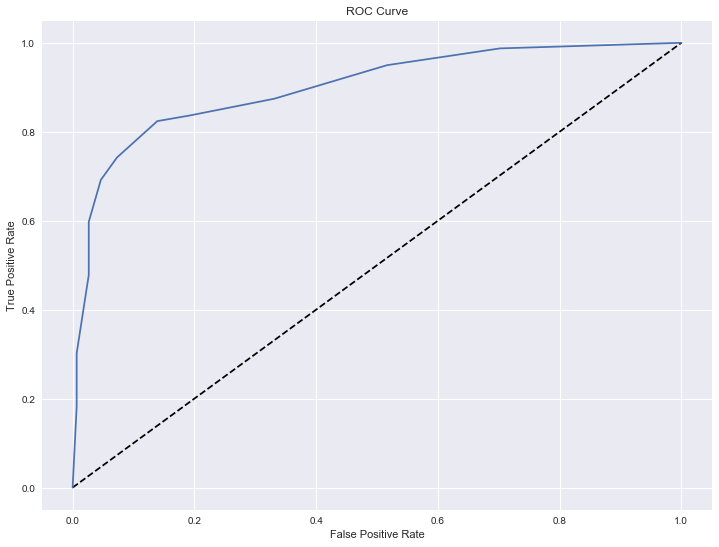

In [32]:
# Compute predicted probabilities
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### Metrics

In [33]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))

# Compute and print AUC score using y_pred_prob
print('AUROC Score:',roc_auc_score(y_test, y_pred_prob))

print('MCC:', matthews_corrcoef(y_test, y_pred))

print('Log Loss:', log_loss(y_test, y_pred))

print('\n Clasification Report:\n', classification_report(y_test, y_pred))

cm =  confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix:\n', cm)

Accuracy Score: 0.832258064516
AUROC Score: 0.899787579658
MCC: 0.678684096198
Log Loss: 5.79362957454

 Clasification Report:
              precision    recall  f1-score   support

          0       0.77      0.93      0.84       151
          1       0.91      0.74      0.82       159

avg / total       0.85      0.83      0.83       310


 Confusion Matrix:
 [[140  11]
 [ 41 118]]


<hr>
### <a id='logreg'>4.2. Logistic Regression Classifier</a>

#### Apply Classifier

In [34]:
# Create the classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

#### ROC Curve

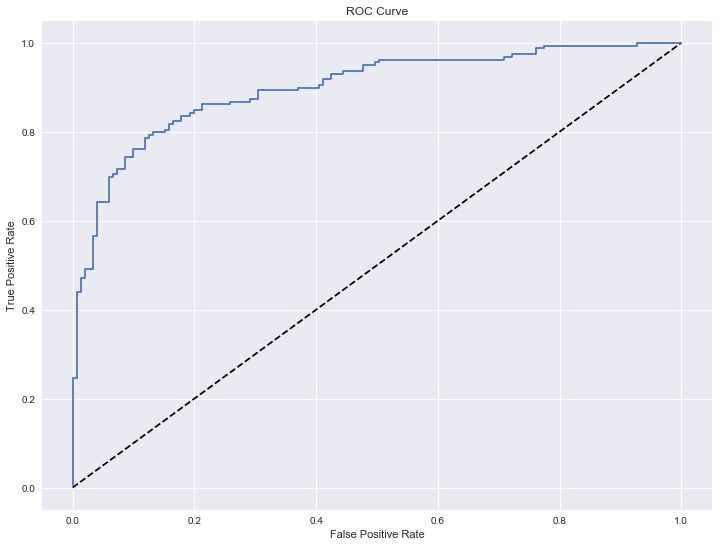

In [35]:
# Compute predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### Metrics

In [36]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))

# Compute and print AUC score using y_pred_prob
print('AUROC Score:',roc_auc_score(y_test, y_pred_prob))

print('MCC:', matthews_corrcoef(y_test, y_pred))

print('Log Loss:', log_loss(y_test, y_pred))

print('\n Clasification Report:\n', classification_report(y_test, y_pred))

cm =  confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix:\n', cm)

Accuracy Score: 0.832258064516
AUROC Score: 0.89874630347
MCC: 0.66779424105
Log Loss: 5.79365020931

 Clasification Report:
              precision    recall  f1-score   support

          0       0.80      0.87      0.84       151
          1       0.87      0.79      0.83       159

avg / total       0.84      0.83      0.83       310


 Confusion Matrix:
 [[132  19]
 [ 33 126]]


### Logistic Regression - SMOTE

In [37]:
# Create the classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train_sm, y_train_sm)

# Predict on the test set
y_pred = logreg.predict(X_test_sm)

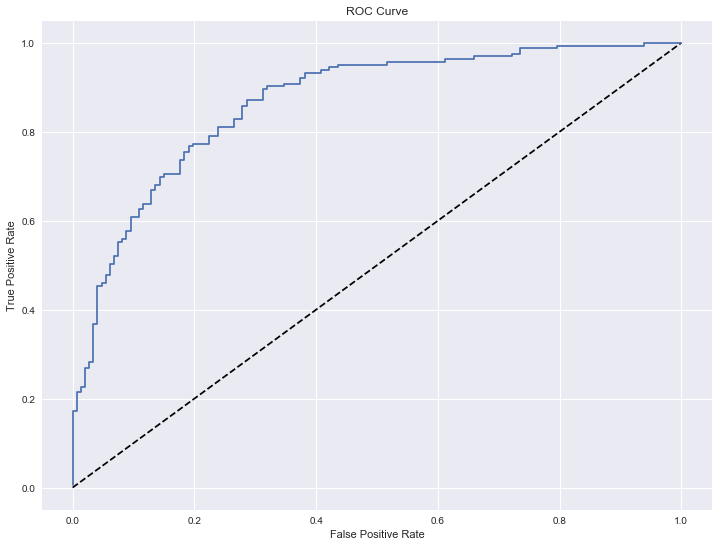

In [38]:
# Compute predicted probabilities
y_pred_prob = logreg.predict_proba(X_test_sm)[:,1]

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test_sm, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [39]:
print('Accuracy Score:', accuracy_score(y_test_sm, y_pred))

# Compute and print AUC score using y_pred_prob
print('AUROC Score:',roc_auc_score(y_test_sm, y_pred_prob))

print('MCC:', matthews_corrcoef(y_test_sm, y_pred))

print('Log Loss:', log_loss(y_test_sm, y_pred))

print('\n Clasification Report:\n', classification_report(y_test_sm, y_pred))

cm =  confusion_matrix(y_test_sm, y_pred)
print('\n Confusion Matrix:\n', cm)

Accuracy Score: 0.777419354839
AUROC Score: 0.866240974918
MCC: 0.554200470961
Log Loss: 7.6877482515

 Clasification Report:
              precision    recall  f1-score   support

          0       0.76      0.78      0.77       147
          1       0.79      0.78      0.79       163

avg / total       0.78      0.78      0.78       310


 Confusion Matrix:
 [[114  33]
 [ 36 127]]


<hr>
### <a id='rf'>4.3. Random Forest Classifier</a>

#### Applying Classifier

In [40]:
# Create the classifier
rf = RandomForestClassifier()

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

#### ROC Curve

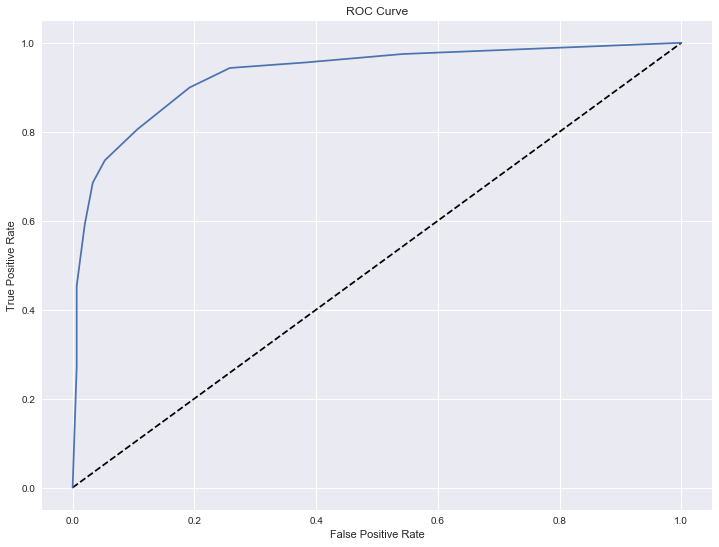

In [41]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### Metrics

In [42]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))

# Compute and print AUC score using y_pred_prob
print('AUROC Score:',roc_auc_score(y_test, y_pred_prob))

print('MCC:', matthews_corrcoef(y_test, y_pred))

print('Log Loss:', log_loss(y_test, y_pred))

print('\n Clasification Report:\n', classification_report(y_test, y_pred))

cm =  confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix:\n', cm)

Accuracy Score: 0.838709677419
AUROC Score: 0.929734682827
MCC: 0.695798542186
Log Loss: 5.57079102105

 Clasification Report:
              precision    recall  f1-score   support

          0       0.77      0.95      0.85       151
          1       0.94      0.74      0.82       159

avg / total       0.86      0.84      0.84       310


 Confusion Matrix:
 [[143   8]
 [ 42 117]]


<hr>

## <a href='#top'>Back to Top ^</a>

<hr>